An advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future.  You're given the past performance data of ads between 1st August to 28th Feb and is tasked to predict an ad's future performance (revenue) between March 1st and March 15th.


# Import Libraries and Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn import metrics

## Import ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Metrics and tuning
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
train_raw=pd.read_csv(r"C:\Users\Uvaise Nazir\Desktop\PM\Data Science\Summer Analytics 21\Hackathon\Train_Data.csv")
test_raw=pd.read_csv(r"C:\Users\Uvaise Nazir\Desktop\PM\Data Science\Summer Analytics 21\Hackathon\Test_Data.csv")
train_raw.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [3]:
test_raw.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


# Exploratory Data Analysis

In [4]:
train_raw.shape,test_raw.shape

((4571, 9), (318, 8))

In [5]:
train_raw.info(),test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost   

(None, None)

### Missing values

In [6]:
train_raw.isna().sum(),test_raw.isna().sum()

(date           0
 campaign       0
 adgroup        0
 ad             0
 impressions    0
 clicks         0
 cost           0
 conversions    0
 revenue        0
 dtype: int64,
 date           0
 campaign       0
 adgroup        0
 ad             0
 cost           0
 impressions    0
 clicks         0
 conversions    0
 dtype: int64)

There are no missing values in both datasets

## Understanding Feature & Target Variable

In [7]:
train_raw.campaign.unique()

array(['campaign 1'], dtype=object)

There is only one type and we could drop this

In [8]:
train_raw.adgroup.unique()

array(['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'], dtype=object)

In [9]:
train_raw.ad.unique()

array(['ad 1', 'ad 2', 'ad 3', 'ad 4', 'ad 5', 'ad 6', 'ad 7', 'ad 8',
       'ad 9', 'ad 10', 'ad 11', 'ad 12', 'ad 13', 'ad 14', 'ad 15',
       'ad 16', 'ad 17', 'ad 18', 'ad 19', 'ad 20', 'ad 21', 'ad 22',
       'ad 23', 'ad 24', 'ad 25', 'ad 26', 'ad 27', 'ad 28', 'ad 29',
       'ad 30', 'ad 31', 'ad 32', 'ad 33', 'ad 34', 'ad 35', 'ad 36',
       'ad 37', 'ad 38', 'ad 39', 'ad 40', 'ad 41', 'ad 42', 'ad 43',
       'ad 44', 'ad 45', 'ad 46', 'ad 47', 'ad 48', 'ad 49', 'ad 50',
       'ad 51', 'ad 52', 'ad 53', 'ad 54', 'ad 55', 'ad 56', 'ad 57',
       'ad 58', 'ad 59', 'ad 60', 'ad 61', 'ad 62', 'ad 63', 'ad 64',
       'ad 65', 'ad 66', 'ad 67', 'ad 68', 'ad 69', 'ad 70'], dtype=object)

In [10]:
test_raw.ad.unique()

array(['ad 1', 'ad 2', 'ad 3', 'ad 4', 'ad 5', 'ad 6', 'ad 7', 'ad 8',
       'ad 10', 'ad 71', 'ad 72', 'ad 73', 'ad 74', 'ad 75', 'ad 56',
       'ad 55'], dtype=object)

In [11]:
train_raw["ad"].value_counts().sort_values()

ad 51      3
ad 69      4
ad 36      4
ad 31      4
ad 24      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

Here we can see that test data contains same campaign and adgroups, however there are only limited ads (16 opposed to 70 in train data). However new ads (ad 71-75) only exist in test data. Once the model is completed we can keep only the test data ad groups and try again. 

Looking at the publishing, we can see that same ad has been published more than once on the same day

### Raw metrics: <br>
Impressions - Number of time the ad was shown <br>
Clicks - Number of time the ad clicked shown <br>
Cost - Amount spent to show ad <br>
Conversions - Number of transactions received (higher the better) <br>
Revenue - Total value of transactions received (higher the better) <br>
<br>
### Efficiency metrics (optional ) <br>
CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant and catchy) <br>
CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click) <br>
CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion) <br>
ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent <br>

## Feature Engineering

In [12]:
def feature(x):
    x['CTR']=x['clicks']/x['impressions']
    x['CPC']=x['cost']/x['clicks']
    x['CPA']=x['cost']/x['conversions']
    return x

In [13]:
feature(train_raw)
feature(test_raw)
train_raw.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225


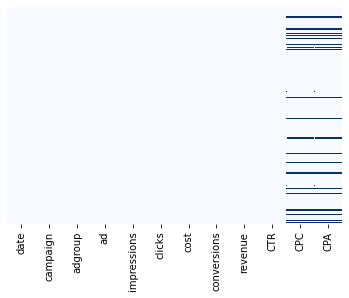

In [14]:
sns.heatmap(train_raw.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_raw.columns);

In [15]:
train_raw.isna().sum(),test_raw.isna().sum()

(date             0
 campaign         0
 adgroup          0
 ad               0
 impressions      0
 clicks           0
 cost             0
 conversions      0
 revenue          0
 CTR              0
 CPC            444
 CPA            444
 dtype: int64,
 date            0
 campaign        0
 adgroup         0
 ad              0
 cost            0
 impressions     0
 clicks          0
 conversions     0
 CTR             0
 CPC            36
 CPA            36
 dtype: int64)

In [16]:
#counting infinity values
count_var=['CTR','CPC','CPA']
count=np.isinf(train_raw[count_var]).sum()
count1=np.isinf(test_raw[count_var]).sum()
count,count1

(CTR       0
 CPC       0
 CPA    2769
 dtype: int64,
 CTR      0
 CPC      0
 CPA    175
 dtype: int64)

There is NaN and Infinity values in the table now. 
2749 out of 4571 values are infinity. <br>
We will try both getting rid of infinity values and keeping them. We will use Impute NaN with mean values/ zero <br>


In [17]:
train_raw = train_raw.replace(np.inf, np.nan)
train_raw = train_raw.fillna(0)
test_raw = test_raw.replace(np.inf, np.nan)
test_raw = test_raw.fillna(0)

In [18]:
train_raw.isna().sum(),test_raw.isna().sum()

(date           0
 campaign       0
 adgroup        0
 ad             0
 impressions    0
 clicks         0
 cost           0
 conversions    0
 revenue        0
 CTR            0
 CPC            0
 CPA            0
 dtype: int64,
 date           0
 campaign       0
 adgroup        0
 ad             0
 cost           0
 impressions    0
 clicks         0
 conversions    0
 CTR            0
 CPC            0
 CPA            0
 dtype: int64)

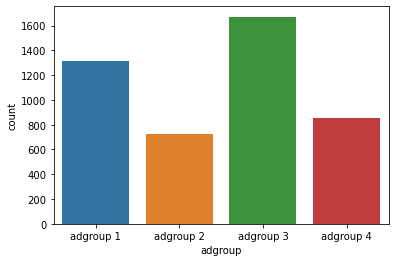

In [19]:
sns.countplot("adgroup", data = train_raw);

### Correlation

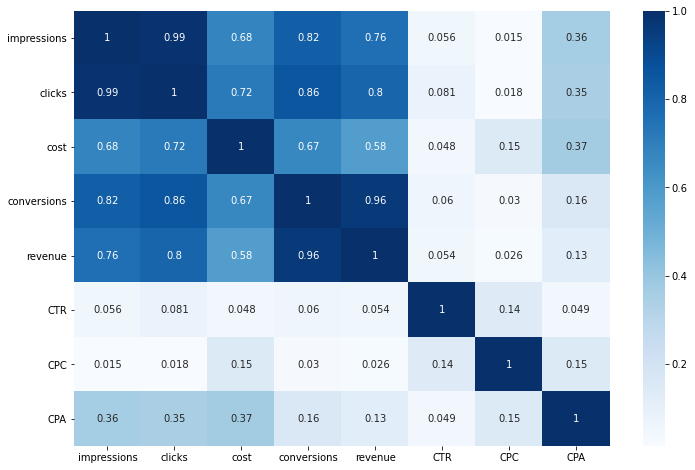

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(train_raw.corr(),cmap='Blues',annot=True)

Here we can see that there is a strong positive correlation  between all variables except efficiency metrics, which is not surprising as there features are all different levels in the same funnel. Although 0.58 is strong correlatioan between cost and revenue this however isnt as strong as the other variables. This is indicative of the fact that spending more money on ads is not the best way for revenue maximization. 


### Outlier Evaluation


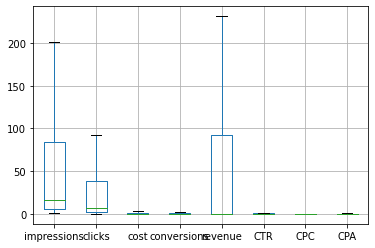

In [21]:
train_raw[train_raw.describe().columns].boxplot(showfliers = False)

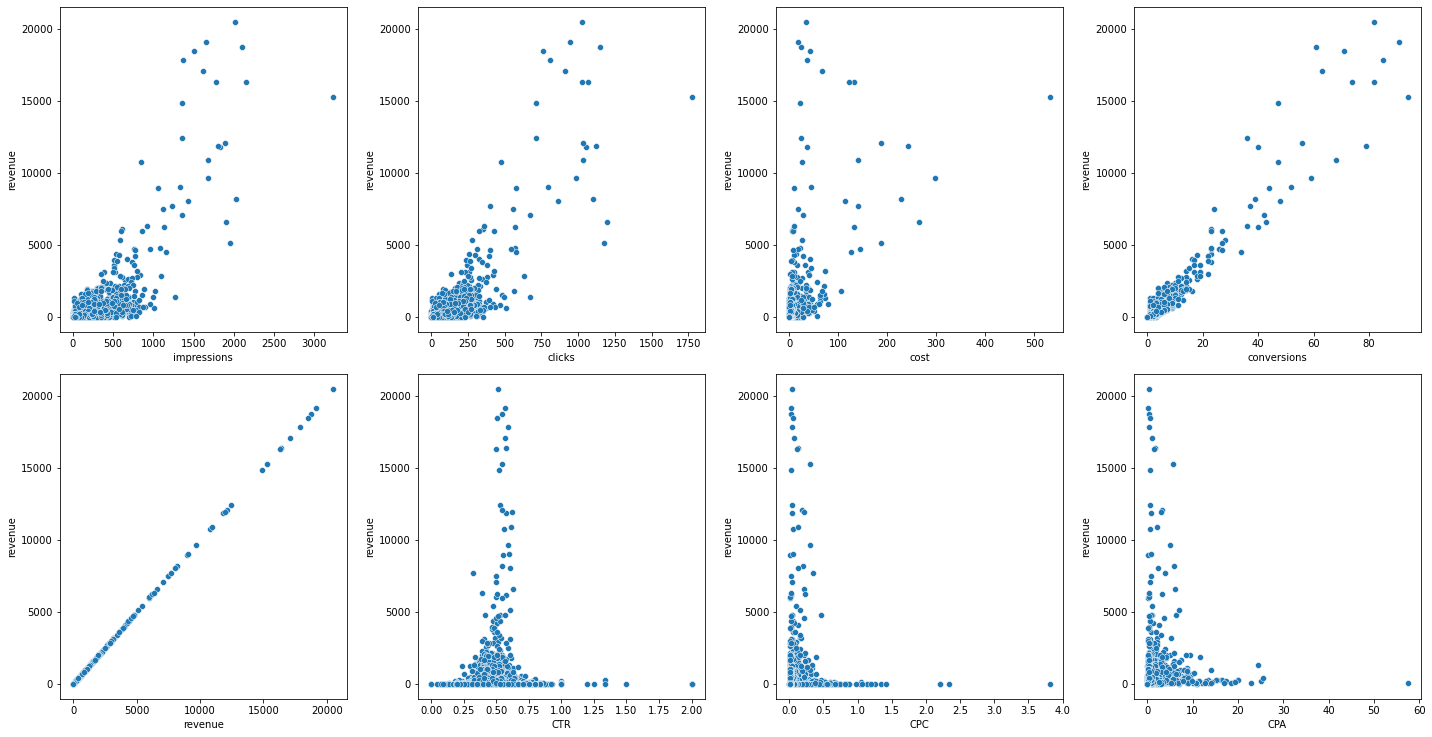

In [22]:
l= train_raw.select_dtypes(include=[np.number]).columns.values
plt.figure(figsize=(20,15))
for i in range(0,8):
    plt.subplot(3 ,4,i+1)
    sns.scatterplot(train_raw[l[i]],train_raw[l[4]])
    plt.tight_layout()

### Checking Skewness

In [23]:
train_raw.skew()

impressions     4.944993
clicks          6.108985
cost           18.786924
conversions    10.355685
revenue        11.661765
CTR             0.600136
CPC            10.091079
CPA             9.813791
dtype: float64

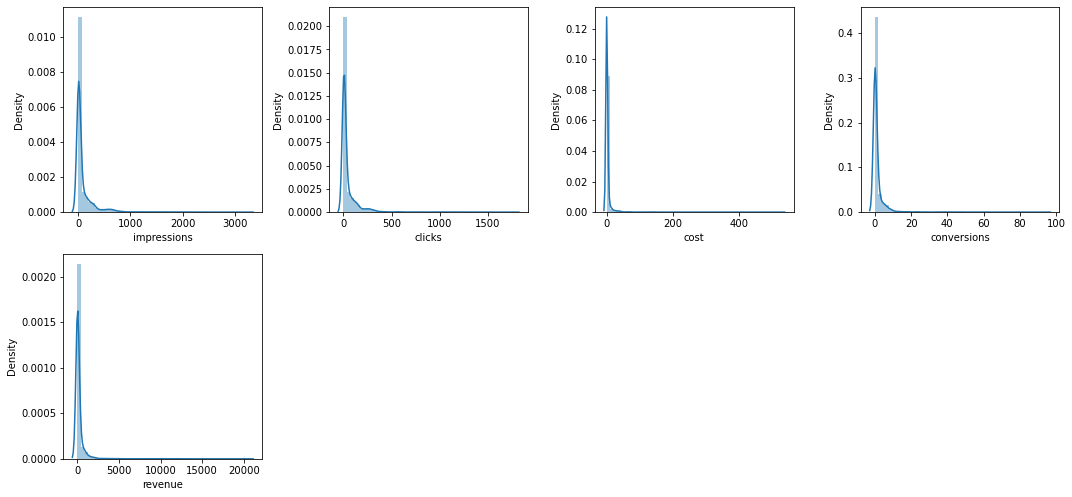

In [24]:
l= train_raw.select_dtypes(include=[np.number]).columns.values
plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.subplot(3 ,4,i+1)
    sns.distplot(train_raw[l[i]],kde=True)
    plt.tight_layout()

# Feature Transformation

## Remove Outliers

In [25]:
nums =['impressions', 'clicks', 'cost', 'conversions','CTR','CPA','CPC']
from scipy import stats
train_raw=train_raw[(np.abs(stats.zscore(train_raw[nums]))<3).all(axis=1)]
train_raw.shape


(4315, 12)

In [26]:
train_raw.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
count,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000
mean,69.048436,31.411587,1.330477,0.804635,125.920948,0.433046,0.044356,0.311621
std,122.738118,55.973773,3.611430,1.901023,333.376432,0.224882,0.069762,0.843935
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.040000,0.000000,0.000000,0.333333,0.010272,0.000000
50%,15.000000,7.000000,0.170000,0.000000,0.000000,0.445312,0.015000,0.000000
75%,67.000000,29.000000,1.090000,1.000000,62.025000,0.531967,0.046056,0.100000
max,685.000000,334.000000,43.690000,17.000000,4074.040000,1.000000,0.462000,6.451667


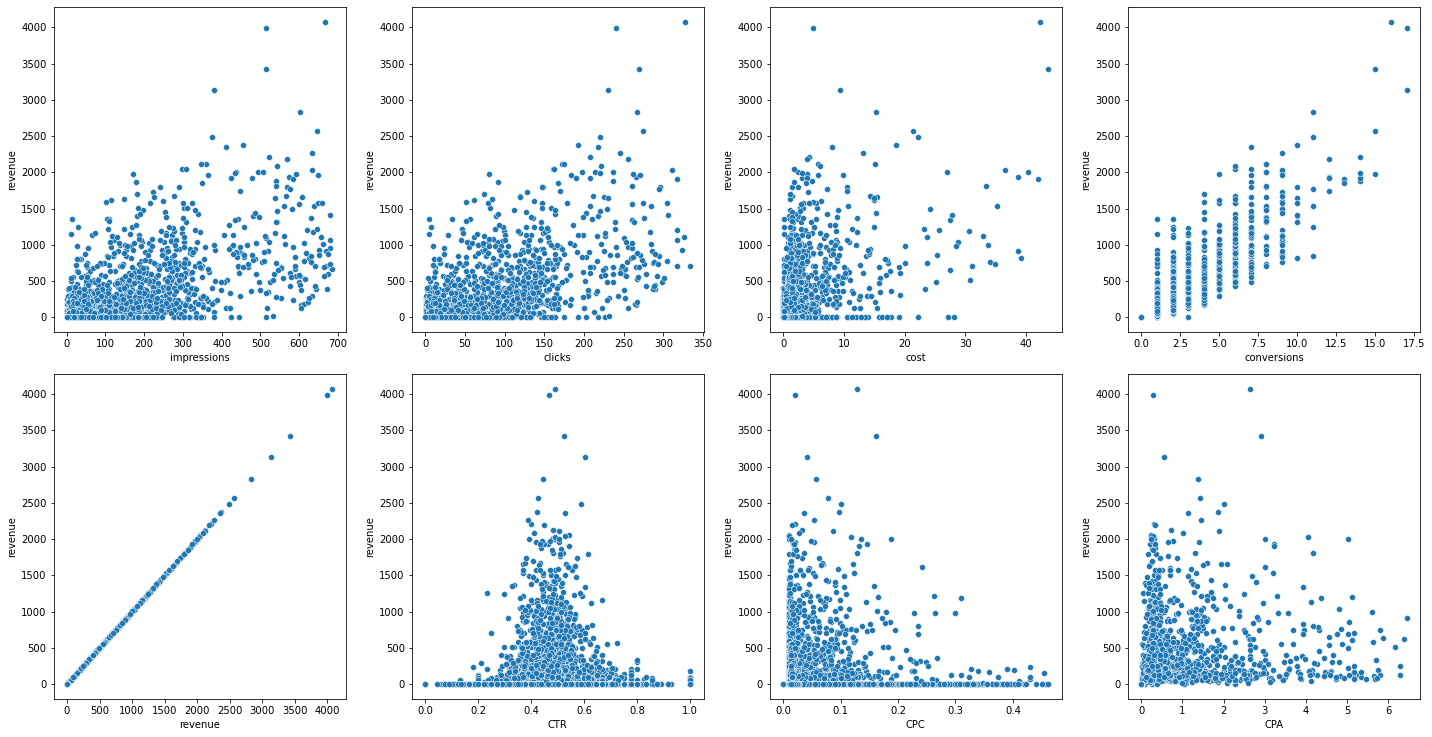

In [27]:
l= train_raw.select_dtypes(include=[np.number]).columns.values
plt.figure(figsize=(20,15))
for i in range(0,8):
    plt.subplot(3 ,4,i+1)
    sns.scatterplot(train_raw[l[i]],train_raw[l[4]])
    plt.tight_layout()

In [28]:
train_raw.skew()

impressions    2.702753
clicks         2.626966
cost           6.121493
conversions    3.435434
revenue        4.234434
CTR            0.133384
CPC            2.983621
CPA            3.905156
dtype: float64

Here we can see that despite the outliers within 3 std deviation taken out the data still has skewness. But the skewness has come down drastically. The number of rows has now reduced from 4571 to 4460.
  <br>
We can apply transformation to further reduce the skewness in data.

## Reduce Skewness

In [29]:
#Log Transform
np.log(train_raw[nums]).skew()

impressions    0.174424
clicks              NaN
cost                NaN
conversions         NaN
CTR                 NaN
CPA                 NaN
CPC                 NaN
dtype: float64

Log transform is difficult because data is't strictly positive

In [30]:
np.sqrt(train_raw[nums]).skew()

impressions    1.540407
clicks         1.439118
cost           2.497585
conversions    1.773679
CTR           -1.436468
CPA            2.153457
CPC            1.444728
dtype: float64

In [31]:
train=train_raw
train[nums]=np.sqrt(train_raw[nums])
train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,4.898979,2.449490,0.282843,0.0,0.00,0.500000,0.115470,0.000000
1,01-08-2020,campaign 1,adgroup 2,ad 1,1.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
2,01-08-2020,campaign 1,adgroup 3,ad 1,3.605551,2.000000,0.200000,0.0,0.00,0.554700,0.100000,0.000000
3,01-08-2020,campaign 1,adgroup 4,ad 1,2.236068,2.000000,0.282843,0.0,0.00,0.894427,0.141421,0.000000
4,01-08-2020,campaign 1,adgroup 1,ad 2,15.716234,11.224972,1.135782,2.0,925.71,0.714228,0.101183,0.567891


In [32]:
test=test_raw
test[nums]=np.sqrt(test_raw[nums])

Here we can see that the skewness has been further reduced. Out of the three techniques sqrt is the only one working for all numerical variables. Boxcox isn't working for 'cost' etc cus the value isn't strictly positive. 

## Feature Selection

ANOVA

In [33]:
train.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue', 'CTR', 'CPC', 'CPA'],
      dtype='object')

In [34]:
var =['impressions', 'clicks', 'cost','conversions','CTR', 'CPC','CPA']
xd=train[var]
yd=train['revenue']
from sklearn.feature_selection import f_classif
fscore,pvalue = f_classif(xd,yd)
for i in range (len(var)):print(var[i],pvalue[i],pvalue[i]<0.05)


impressions 0.0 True
clicks 0.0 True
cost 0.0 True
conversions 0.0 True
CTR 0.9999999999999999 False
CPC 0.9999999999999553 False
CPA 0.0 True


It's showing that CTR & CPC is are significant varaibles for the model. We will remove it and try when fine tuning the model

## Transforming & Encoding Categorical Variables

In [35]:
train=train.drop(['date','ad','campaign'],1)
train.head()

,adgroup,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,adgroup 1,4.898979,2.449490,0.282843,0.0,0.00,0.500000,0.115470,0.000000
1,adgroup 2,1.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000
2,adgroup 3,3.605551,2.000000,0.200000,0.0,0.00,0.554700,0.100000,0.000000
3,adgroup 4,2.236068,2.000000,0.282843,0.0,0.00,0.894427,0.141421,0.000000
4,adgroup 1,15.716234,11.224972,1.135782,2.0,925.71,0.714228,0.101183,0.567891


In [36]:
test=test.drop(['date','ad','campaign'],1)
test.head()

,adgroup,cost,impressions,clicks,conversions,CTR,CPC,CPA
0,adgroup 1,0.761577,11.000000,7.000000,1.0,0.636364,0.108797,0.761577
1,adgroup 3,0.412311,4.690416,3.464102,0.0,0.738549,0.119024,0.000000
2,adgroup 4,0.223607,2.236068,1.732051,0.0,0.774597,0.129099,0.000000
3,adgroup 2,0.100000,1.414214,1.000000,0.0,0.707107,0.100000,0.000000
4,adgroup 2,0.100000,1.732051,1.000000,0.0,0.577350,0.100000,0.000000


In [37]:
'''
change categorical features to numerical
train[['del', 'adgroup']] = train['adgroup'].str.split(' ', 1, expand=True)
train[['del1', 'ad']] = train['ad'].str.split(' ', 1, expand=True)
train=train.drop(['del'],axis=1)
train.head()
'''

"\nchange categorical features to numerical\ntrain[['del', 'adgroup']] = train['adgroup'].str.split(' ', 1, expand=True)\ntrain[['del1', 'ad']] = train['ad'].str.split(' ', 1, expand=True)\ntrain=train.drop(['del'],axis=1)\ntrain.head()\n"

In [38]:
train.columns

Index(['adgroup', 'impressions', 'clicks', 'cost', 'conversions', 'revenue',
       'CTR', 'CPC', 'CPA'],
      dtype='object')

In [39]:
#onehotencoding on nominal data
train= pd.get_dummies(train, columns=['adgroup'])
test= pd.get_dummies(test, columns=['adgroup'])
#train= pd.get_dummies(train, columns=['ad'])
train.head()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,4.898979,2.449490,0.282843,0.0,0.00,0.500000,0.115470,0.000000,1,0,0,0
1,1.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0,1,0,0
2,3.605551,2.000000,0.200000,0.0,0.00,0.554700,0.100000,0.000000,0,0,1,0
3,2.236068,2.000000,0.282843,0.0,0.00,0.894427,0.141421,0.000000,0,0,0,1
4,15.716234,11.224972,1.135782,2.0,925.71,0.714228,0.101183,0.567891,1,0,0,0


In [40]:
#train['date'] = pd.to_numeric(pd.to_datetime(train['date'], format = '%d-%m-%Y', errors = 'coerce'))
#train.head()

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names=['impressions', 'clicks', 'cost', 'conversions', 'CTR','CPC','CPA']
train_scaled=train
train_scaled[col_names]=pd.DataFrame(scaler.fit_transform(train[col_names]))
train_scaled.head()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,-0.220058,-0.408371,-0.530039,-0.548181,0.00,-0.470910,-0.419239,-0.508196,1,0,0,0
1,-0.915451,-1.038446,-0.852217,-0.548181,0.00,-2.557088,-1.332774,-0.508196,0,1,0,0
2,-0.450744,-0.523992,-0.624402,-0.548181,0.00,-0.242681,-0.541630,-0.508196,0,0,1,0
3,-0.694995,-0.523992,-0.530039,-0.548181,0.00,1.174781,-0.213927,-0.508196,0,0,0,1
4,1.709227,1.848920,0.441520,1.994466,925.71,0.422925,-0.532267,0.632939,1,0,0,0


In [42]:
test_scaled=test
test_scaled[col_names]=pd.DataFrame(scaler.fit_transform(test[col_names]))
test_scaled.head()

,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,0.730585,0.896571,0.807239,0.684213,0.079172,0.191862,1.537918,1,0,0,0
1,-0.124604,-0.299159,-0.175051,-0.637589,0.481745,0.455112,-0.619341,0,0,1,0
2,-0.586649,-0.764283,-0.656223,-0.637589,0.623760,0.714464,-0.619341,0,0,0,1
3,-0.889304,-0.920033,-0.859591,-0.637589,0.357875,-0.034571,-0.619341,0,1,0,0
4,-0.889304,-0.859799,-0.859591,-0.637589,-0.153319,-0.034571,-0.619341,0,1,0,0


In [43]:
train_scaled.isna().sum()

impressions          256
clicks               256
cost                 256
conversions          256
revenue                0
CTR                  256
CPC                  256
CPA                  256
adgroup_adgroup 1      0
adgroup_adgroup 2      0
adgroup_adgroup 3      0
adgroup_adgroup 4      0
dtype: int64

In [44]:
train_scaled = train_scaled.fillna(0)
test_scaled = test_scaled.fillna(0)


In [45]:
train_scaled.isna().sum(),test_scaled.isna().sum()

(impressions          0
 clicks               0
 cost                 0
 conversions          0
 revenue              0
 CTR                  0
 CPC                  0
 CPA                  0
 adgroup_adgroup 1    0
 adgroup_adgroup 2    0
 adgroup_adgroup 3    0
 adgroup_adgroup 4    0
 dtype: int64,
 cost                 0
 impressions          0
 clicks               0
 conversions          0
 CTR                  0
 CPC                  0
 CPA                  0
 adgroup_adgroup 1    0
 adgroup_adgroup 2    0
 adgroup_adgroup 3    0
 adgroup_adgroup 4    0
 dtype: int64)

In [46]:
'''
#to round data
e_metric= ['impressions', 'clicks', 'cost', 'conversions', 'revenue', 'CTR', 'CPC']
train_scaled[e_metric]=train_scaled[e_metric].round(2)
train_scaled.head()
'''

"\n#to round data\ne_metric= ['impressions', 'clicks', 'cost', 'conversions', 'revenue', 'CTR', 'CPC']\ntrain_scaled[e_metric]=train_scaled[e_metric].round(2)\ntrain_scaled.head()\n"

Split Data

In [47]:
train_scaled.shape, test_scaled.shape

((4315, 12), (318, 11))

In [48]:
X = train_scaled.drop('revenue', axis=1).values
y = train_scaled['revenue'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3452, 11), (863, 11), (3452,), (863,))

In [51]:
'''
#label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
le.transform(y_train)
'''

'\n#label encoder \nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nle.fit(y_train)\nle.transform(y_train)\n'

## Apply Machine Learning


In [52]:
linreg= LinearRegression()
lasso= Lasso()
ridge=Ridge()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)
XGB=XGBRegressor(learning_rate=0.05,n_estimators=50,enable_categorical=True)
CBR= CatBoostRegressor(learning_rate=0.05,n_estimators=50)

In [53]:
def build_model(model):
    model.fit(X_train,y_train)
    print(model)
    pred = model.predict(X_train)
    print("Train set R2:", r2_score(y_train, model.predict(X_train)))
    print("Test set R2:", r2_score(y_test, model.predict(X_test)))
    print("Train set RMSE:", np.sqrt(mean_squared_error(y_train, model.predict(X_train),squared=False)))
    print("Test set RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test),squared=False)))
    pred = model.predict(test_scaled)
    return pd.DataFrame(pred)


In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3452, 11), (3452,), (863, 11), (863,))

In [55]:
build_model(linreg)

LinearRegression()
Train set R2: 0.09323881320962935
Test set R2: 0.062337358657815645
Train set RMSE: 17.585837985628945
Test set RMSE: 18.81458524547156


,0
0,251.669076
1,130.835452
2,-13.166722
3,-19.293302
4,-0.066860
...,...
313,-48.467624
314,190.337984
315,172.045966
316,161.039543


In [56]:
build_model(lasso)

Lasso()
Train set R2: 0.09096643403642135
Test set R2: 0.05475922657717158
Train set RMSE: 17.596845346988125
Test set RMSE: 18.852485155429633


,0
0,220.655230
1,158.065324
2,18.546360
3,-2.138613
4,-1.624064
...,...
313,1.486380
314,157.431995
315,171.483417
316,167.413197


In [57]:
build_model(ridge)

Ridge()
Train set R2: 0.09323284088994255
Test set R2: 0.06206520130054338
Train set RMSE: 17.58586694253307
Test set RMSE: 18.815950334131422


,0
0,250.150260
1,132.471857
2,-11.301826
3,-18.421330
4,-0.189023
...,...
313,-45.875694
314,188.767375
315,172.121333
316,161.698917


In [58]:
build_model(DTR)

DecisionTreeRegressor()
Train set R2: 0.8807366194432894
Test set R2: -0.6641980879186165
Train set RMSE: 10.590503694931266
Test set RMSE: 21.71622088740066


,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
313,94.966667
314,342.000000
315,0.000000
316,149.290000


In [59]:
build_model(RFR)


RandomForestRegressor()
Train set R2: 0.773271130119425
Test set R2: -0.01818595845974791
Train set RMSE: 12.435594240407868
Test set RMSE: 19.206125910049046


,0
0,459.434500
1,214.017600
2,57.615800
3,7.415086
4,7.072049
...,...
313,85.789235
314,224.587513
315,246.544400
316,576.530080


In [60]:
pred=build_model(GBR)

GradientBoostingRegressor(n_estimators=50)
Train set R2: 0.22106683905150804
Test set R2: 0.0684040671348487
Train set RMSE: 16.930309034948305
Test set RMSE: 18.784078379631282


In [61]:
build_model(XGB)

[08:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=True,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None

,0
0,315.922791
1,146.725143
2,12.660090
3,9.503171
4,6.375917
...,...
313,15.319168
314,131.974838
315,139.546494
316,181.823074


In [62]:
build_model(CBR)

0:	learn: 323.0848722	total: 159ms	remaining: 7.8s
1:	learn: 321.6390441	total: 174ms	remaining: 4.18s
2:	learn: 320.4693078	total: 178ms	remaining: 2.8s
3:	learn: 319.2473699	total: 184ms	remaining: 2.11s
4:	learn: 317.9646210	total: 189ms	remaining: 1.7s
5:	learn: 316.7247448	total: 195ms	remaining: 1.43s
6:	learn: 315.7179697	total: 200ms	remaining: 1.23s
7:	learn: 314.7827819	total: 205ms	remaining: 1.07s
8:	learn: 313.6369433	total: 210ms	remaining: 956ms
9:	learn: 312.7293459	total: 214ms	remaining: 857ms
10:	learn: 311.7392880	total: 219ms	remaining: 776ms
11:	learn: 311.1988361	total: 224ms	remaining: 711ms
12:	learn: 310.5914804	total: 229ms	remaining: 651ms
13:	learn: 309.9545938	total: 234ms	remaining: 602ms
14:	learn: 309.3878786	total: 239ms	remaining: 558ms
15:	learn: 308.5814138	total: 244ms	remaining: 518ms
16:	learn: 308.1310573	total: 248ms	remaining: 482ms
17:	learn: 307.7287880	total: 253ms	remaining: 450ms
18:	learn: 307.3277836	total: 258ms	remaining: 421ms
19:	le

,0
0,223.421606
1,155.500126
2,32.889593
3,29.990400
4,26.378124
...,...
313,31.956724
314,129.818709
315,162.152648
316,151.073118


We could see that the Gradient Boost Regressor has the highest RMSE and RMSE for test and train is close. That would mean the model is a decent fit. However there is a lot of room for model tuning and improvement.
 

## Model Tuning

In [63]:
LR = {'learning_rate':[0.15,0.1,0.05],'n_estimators':[50,100,150,200,250]}
tuning =GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_, tuning.best_estimator_, tuning.best_index_

({'learning_rate': 0.05, 'n_estimators': 100},
 0.10706575214825512,
 GradientBoostingRegressor(learning_rate=0.05),
 11)

## Export Model

In [64]:
predictions=pd.DataFrame(pred)
predictions.columns=['revenue']
predictions.to_csv("submission_gbr.csv",index=False)

There are still many variables to play around with to improve the model. We cold try deep learning models, also do some feature engineering, say, see whether the ad appeared on weekday/ weekend. 